# How to:
Upload the histories folder from the previous notebook to continue the graphing and analysis

In [ ]:
# Load all previous results
original_predictions = pickle.load(open('./histories/original_predictions.pkl', 'rb'))
original_training_history = json.load(open('./histories/original_training_history.json'))
eyes_predictions = pickle.load(open('./histories/eyes_predictions.pkl', 'rb'))
eyes_training_history = json.load(open('./histories/eyes_training_history.json'))
mouth_predictions = pickle.load(open('./histories/mouth_predictions.pkl', 'rb'))
mouth_training_history = json.load(open('./histories/mouth_training_history.json'))
both_predictions = pickle.load(open('./histories/both_predictions.pkl', 'rb'))
both_training_history = json.load(open('./histories/both_training_history.json'))
all_results = {
    'original' : [original_predictions, original_training_history],
    'eyes' : [eyes_predictions, eyes_training_history],
    'mouth' : [mouth_predictions, mouth_training_history],
    'both' : [both_predictions, both_training_history]
}

In [ ]:
accuracy_scores = {}
for k, pair in all_results.items():
  accuracy_scores[k] = []
  predictions = pair[0]['predictions']
  labels = pair[1]['labels']
  total = {} 
  correct = {}
  for i in range(0,7):
    correct[i] = 0
    total[i] = 0
  for i in range(0,len(predictions)):
    l = labels[i]
    total[l] = total[l] + 1
    if labels[i] == predictions[i]:
      correct[l] = correct[l] + 1
  for i in range(0,7):
    # if k not in accuracy_scores.keys():    
    accuracy_scores[k].append(round(correct[i]/total[i]*100, 2))

print(accuracy_scores)

{'original': [100.0, 100.0, 96.88, 96.77, 100.0, 96.77, 100.0], 'eyes': [93.33, 96.55, 96.88, 100.0, 100.0, 90.32, 100.0], 'mouth': [86.67, 100.0, 96.88, 100.0, 96.67, 96.77, 100.0], 'both': [100.0, 89.66, 93.75, 90.32, 100.0, 96.77, 100.0]}


<Figure size 432x288 with 0 Axes>

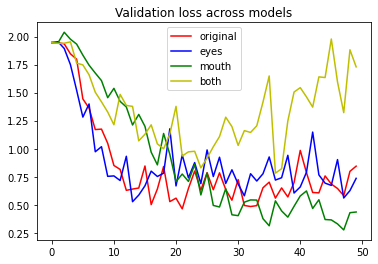

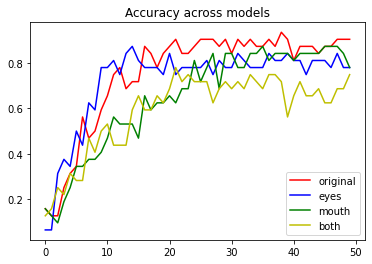

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

epochs = range(len(original_training_history['accuracy']))

plt.plot(epochs, original_training_history['val_loss'], 'r', label='original')
plt.plot(epochs, eyes_training_history['val_loss'], 'b', label='eyes')
plt.plot(epochs, mouth_training_history['val_loss'], 'g', label='mouth')
plt.plot(epochs, both_training_history['val_loss'], 'y', label='both')
plt.title('Validation loss across models')
plt.legend()
plt.figure()

plt.plot(epochs, original_training_history['val_accuracy'], 'r', label='original')
plt.plot(epochs, eyes_training_history['val_accuracy'], 'b', label='eyes')
plt.plot(epochs, mouth_training_history['val_accuracy'], 'g', label='mouth')
plt.plot(epochs, both_training_history['val_accuracy'], 'y', label='both')
plt.title('Accuracy across models')
plt.legend()
plt.figure()